# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [22]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [182]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']
btc_price

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
eth_price

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $70620.00
The current value of your 5.3 ETH is $21813.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [61]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [175]:
# Format current date as ISO format

import datetime
yesterday = datetime.datetime.now() - datetime.timedelta(days = 1)

#today = pd.Timestamp("2021-05-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = yesterday,
    end = yesterday
).df

# Preview DataFrame
df_portfolio

AGG                                        \
                             open     high       low     close   volume   
time                                                                      
2020-12-14 00:00:00-05:00  117.86  118.025  117.7969  117.9700  3047181   
2020-12-15 00:00:00-05:00  117.95  118.030  117.9000  118.0300  3826081   
2020-12-16 00:00:00-05:00  117.83  118.033  117.7610  117.9700  4415156   
2020-12-17 00:00:00-05:00  118.01  118.060  117.7299  117.8400  6187968   
2020-12-18 00:00:00-05:00  117.97  117.970  117.7600  117.8100  3472883   
...                           ...      ...       ...       ...      ...   
2021-05-03 00:00:00-04:00  114.40  114.590  114.3300  114.4000  5537985   
2021-05-04 00:00:00-04:00  114.55  114.700  114.4100  114.5285  4679145   
2021-05-05 00:00:00-04:00  114.45  114.620  114.4222  114.6100  3861137   
2021-05-06 00:00:00-04:00  114.55  114.710  114.5300  114.6500  4557124   
2021-05-07 00:00:00-04:00  114.85  114.970  114.5700  114.6450  6812067   

                              SPY                                        
                             open      high       low   close    volume  
time                                                                     
2020-12-14 00:00:00-05:00  368.64  369.8000  364.4700  364.61  54732478  
2020-12-15 00:00:00-05:00  367.40  369.5798  365.9200  369.57  50997562  
2020-12-16 00:00:00-05:00  369.82  371.1600  368.8676  370.14  47524603  
2020-12-17 00:00:00-05:00  371.94  372.4600  371.0500  372.21  50863245  
2020-12-18 00:00:00-05:00  370.97  371.1500  367.0200  369.13  89156141  
...                           ...       ...       ...     ...       ...  
2021-05-03 00:00:00-04:00  419.43  419.8400  417.6650  418.18  60956273  
2021-05-04 00:00:00-04:00  416.08  416.6000  411.6700  415.64  88481725  
2021-05-05 00:00:00-04:00  417.38  417.6300  414.9400  415.72  51327353  
2021-05-06 00:00:00-04:00  415.83  419.2100  413.6750  419.08  65404082  
2021-05-07 00:00:00-04:00  419.89  422.8150  419.1600  422.09  58002195  

[100 rows x 10 columns]

In [181]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][-1]
spy_close_price = df_portfolio['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.645
Current SPY closing price: $422.09


In [74]:
# Compute the current value of shares
my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5732.50
The current value of your 200 AGG shares is $83816.00


### Savings Health Analysis

In [92]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

data = {'Asset': ['crypto','shares'], 'Amounts': [crypto, shares]}
df_savings = pd.DataFrame (data, columns = ['Asset','Amounts'])
df_savings = df_savings.set_index('Asset')

# Display savings DataFrame
display(df_savings)

,Amounts
Asset,
crypto,91033.405
shares,89548.500


array([<AxesSubplot:>], dtype=object)

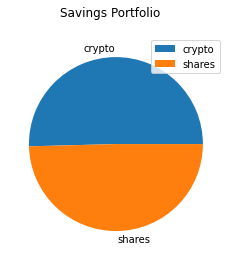

In [193]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, ylabel ='', title="Savings Portfolio")

In [191]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto + shares

# Validate saving health
saving_health = savings >=emergency_fund

if saving_health == True:
    print (f"Enjoy your life, you have enough savings!")
if saving_health == False:
    print(f"Take it easy, time to save up")


Enjoy your life, you have enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [150]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-07', tz='America/New_York').isoformat()

In [151]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-05-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.67  82965499.0  
2017-05-19 00:00:00-04:00  237.33  239.08  237.27  238.30  69366163.0  
2017-05-22 00:00:00-04:00  238.90  239.71  238.82  239.53  37630972.0  
2017-05-23 00:00:00-04:00  239.95  240.24  239.51  240.02  36771135.0

In [154]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Weights are set at 80% and 20% due to share volume (200 and 50 respectively)
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [155]:
# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [156]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994619,1.001974,1.003555,0.980419,1.001250,1.000351,0.992764,1.005175,1.015696,0.997722,...,1.012508,0.992705,0.999670,0.991217,0.998035,1.008158,1.000959,1.001575,0.991723,1.007743
2,0.984331,0.996936,0.998097,0.973217,1.005769,0.997429,0.988091,1.006467,1.021591,0.996912,...,1.017193,0.994490,0.995424,0.999868,0.994969,1.003141,0.987653,1.017171,0.987432,1.005107
3,0.995609,1.004786,1.006275,0.970367,1.008832,0.985964,0.987618,0.992599,1.027037,1.004285,...,1.026540,0.994900,0.997088,1.002432,0.995645,1.007072,0.975131,1.017084,0.973945,1.010863
4,1.003084,1.004020,1.013183,0.976675,1.003048,0.989205,0.973593,0.994554,1.031572,0.981536,...,1.024044,0.993816,0.991760,1.009281,0.986586,0.998209,0.983191,1.024646,0.970908,1.009169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.019086,8.049361,16.490621,14.392019,22.957863,5.133571,8.176421,4.170009,17.496532,16.412411,...,10.191446,12.386657,4.865676,15.567129,13.690880,18.693147,6.262519,17.180976,34.480593,6.279407
7557,19.130245,8.050108,16.506032,14.420846,22.872368,5.117354,8.082167,4.186229,17.882913,16.320687,...,10.133261,12.426835,4.848378,15.700935,14.021941,18.629293,6.292263,16.955117,34.719450,6.271067
7558,19.390928,8.004477,16.532960,14.452760,23.094410,5.050754,8.117342,4.168802,18.094641,16.366006,...,10.341533,12.577270,4.800466,15.775470,14.149209,18.356117,6.360950,16.986131,35.048166,6.294964
7559,19.413926,8.024668,16.657171,14.517162,22.964878,5.069483,8.219389,4.183429,17.892175,16.506983,...,10.280558,12.712838,4.884471,15.717098,14.141281,18.262101,6.429610,17.044292,34.936320,6.250183


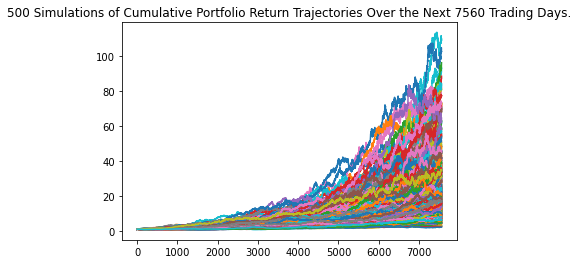

In [157]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

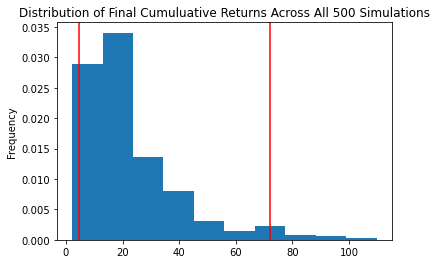

In [158]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [159]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()


# Print summary statistics
print(even_tbl)

count           500.000000
mean             22.914526
std              17.234610
min               2.216687
25%              11.518099
50%              17.714875
75%              28.862785
max             109.701640
95% CI Lower      4.747822
95% CI Upper     72.164216
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [160]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $94956.43 and $1443284.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [161]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142434.65 and $2164926.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [162]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_even_dist_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist_5y.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [163]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003926,1.012502,0.996555,1.002237,0.996154,1.003641,1.012265,1.002713,1.004872,1.000506,...,1.003393,1.003989,0.999247,1.007640,1.013263,0.986910,0.988934,0.991703,1.005564,0.999597
2,1.007388,1.023657,0.997194,1.000197,1.000716,0.988103,1.011658,0.993042,1.012561,0.997833,...,0.987391,1.000473,1.005745,1.021264,1.015297,0.985171,0.996587,0.990773,1.004699,0.998779
3,1.007483,1.025340,1.009338,0.993323,0.994912,0.985877,1.021642,0.994465,1.013642,0.990762,...,0.987788,0.999158,1.005028,1.039081,1.004735,0.979972,0.997937,0.985704,0.993722,1.002625
4,1.007189,1.018259,1.004981,0.981761,1.003838,0.989221,1.028753,0.988489,1.004892,0.989637,...,0.967612,1.004636,1.007112,1.034560,0.990179,0.984575,0.999244,0.988192,0.987511,1.005983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.645901,1.535958,2.052884,1.928105,1.032553,1.484061,1.297482,1.972625,1.253275,1.061401,...,1.359628,2.059584,2.463434,1.668995,1.184485,0.955345,1.700202,1.396794,1.822763,1.445279
1257,1.642368,1.550795,2.058710,1.941522,1.038501,1.482817,1.307304,1.968846,1.247037,1.050811,...,1.351322,2.020628,2.453309,1.626858,1.183209,0.955164,1.720115,1.375418,1.814264,1.455145
1258,1.623059,1.563600,2.086630,1.949429,1.051803,1.484531,1.299718,1.965780,1.245349,1.052971,...,1.358861,2.019750,2.457587,1.608599,1.197078,0.954953,1.707205,1.384243,1.794286,1.445112
1259,1.616426,1.572181,2.098729,1.939046,1.046450,1.487934,1.294677,1.960536,1.251526,1.053431,...,1.360830,2.041145,2.448792,1.607820,1.194240,0.960581,1.695018,1.379898,1.805055,1.456116


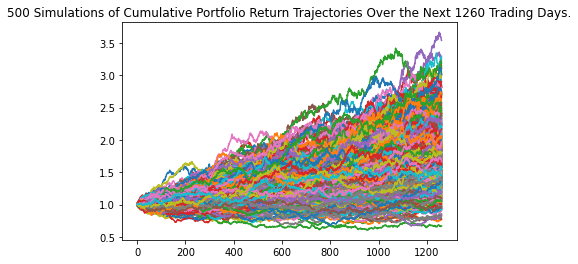

In [164]:
# Plot simulation outcomes
line_plot_5y = MC_even_dist_5y.plot_simulation()

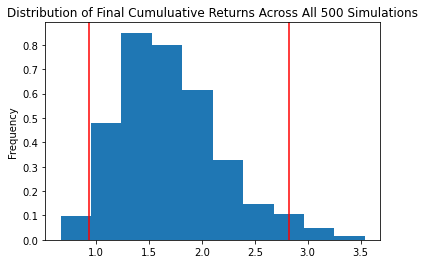

In [165]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_even_dist_5y.plot_distribution()

In [166]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5y = MC_even_dist_5y.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5y)

count           500.000000
mean              1.700324
std               0.485244
min               0.667570
25%               1.361274
50%               1.631686
75%               1.966687
max               3.538948
95% CI Lower      0.937443
95% CI Upper      2.819802
Name: 1260, dtype: float64


In [167]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*15000,2)
ci_upper_five = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $71217.32 and $1082463.25


### Ten Years Retirement Option

In [168]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_even_dist_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_even_dist_10y.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [169]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007341,0.994235,1.005091,0.997510,1.001083,1.012082,0.998065,1.015065,0.989785,1.004765,...,1.003335,1.006392,0.997713,0.987689,1.003296,0.993951,0.997751,0.974089,1.009610,0.999367
2,0.995029,0.985136,1.001193,0.999176,1.001412,1.013109,0.986195,1.014359,0.989563,1.015615,...,1.000565,0.997411,1.024505,0.997669,1.002229,1.003840,1.003725,0.970900,1.012586,0.990718
3,0.999997,0.993885,0.992176,0.986186,0.995279,1.010446,0.972820,1.016970,0.990034,1.023585,...,1.020648,1.018472,1.026909,1.003160,0.991671,1.003875,1.006032,0.969033,1.005203,0.998565
4,1.005144,1.001711,0.986261,0.986939,0.999588,1.011765,0.980653,1.018297,1.002178,1.020084,...,1.019860,1.005085,1.027847,1.017189,0.984369,0.996607,1.003260,0.971088,1.003591,1.013133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.501596,1.785164,3.824731,3.964837,4.144453,1.748652,2.209688,4.605615,1.771843,2.934740,...,1.404450,2.865649,6.940898,1.260346,2.278162,3.238758,3.095517,2.681442,3.093609,2.255573
2517,2.505370,1.775237,3.812412,3.973897,4.160915,1.730389,2.216022,4.595006,1.798194,2.941099,...,1.394132,2.880718,6.941172,1.269629,2.280572,3.191133,3.095371,2.672612,3.130103,2.255747
2518,2.506996,1.766114,3.847785,3.951422,4.189191,1.723049,2.233072,4.538155,1.772672,2.889912,...,1.402990,2.879743,7.008467,1.291201,2.293404,3.207234,3.088321,2.684348,3.139107,2.258541
2519,2.500270,1.740953,3.860036,3.964459,4.169746,1.724600,2.237432,4.516444,1.764096,2.856143,...,1.397095,2.825679,6.934612,1.295434,2.272596,3.221073,3.092682,2.677024,3.167979,2.274284


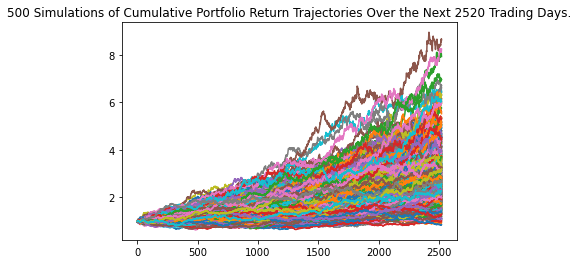

In [170]:
# Plot simulation outcomes
line_plot_10y = MC_even_dist_10y.plot_simulation()

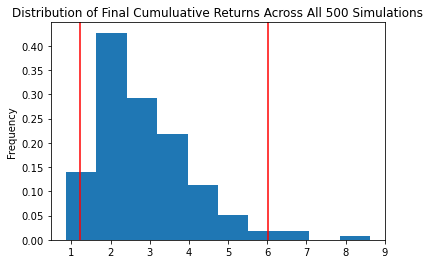

In [171]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_even_dist_10y.plot_distribution()

In [172]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10y = MC_even_dist_10y.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10y)

count           500.000000
mean              2.859656
std               1.220066
min               0.855821
25%               1.983396
50%               2.576889
75%               3.421629
max               8.627061
95% CI Lower      1.216709
95% CI Upper      6.016352
Name: 2520, dtype: float64


In [173]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $94956.43 and $1443284.33


In [174]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")



There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $142434.65 and $2164926.49
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $71217.32 and $1082463.25
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $94956.43 and $1443284.33
